put in your url --> MUST BE A JPEG: 
http://s3.amazonaws.com/uploads.shareist.com/63c0a592967dcc0db4b77469e01169c5_36610_l.jpg


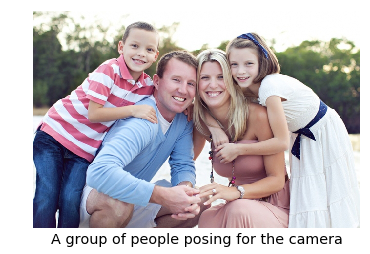

In [1]:
import requests
%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
subscription_key = "d456f87f10544191aae54b20c129473a"
assert subscription_key
vision_base_url = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/analyze?visualFeatures=Description&language=en'
image_url = input('put in your url --> MUST BE A JPEG: \n')
headers  = {'Ocp-Apim-Subscription-Key': subscription_key }
params   = {'visualFeatures': 'Categories,Description,Color'}
data     = {'url': image_url}
response = requests.post(vision_base_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
